# Desafío Integrador: Modelo de Clasificación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc,  recall_score, precision_score, f1_score
from sklearn import tree

## Preprocesamiento

In [2]:
import imblearn
print(imblearn.__version__)

0.10.1


In [3]:
df = pd.read_csv('C:/Users/Ian Denham/Desktop/Data Science/TP_Integrador/df_final.csv')

c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(438928, 17)

In [5]:
df.head()

,crash_date,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season,deaths
0,2021-12-14,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",4486519,0,0,Passenger vehicle,Passing Too Closely,avenue,14:58:00,day,Tuesday,Winter,0
1,2021-12-14,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",4487127,0,0,Passenger vehicle,Turning Improperly,boulevard,16:50:00,day,Tuesday,Winter,0
2,2021-12-14,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",4486635,4,0,Passenger vehicle,Other,avenue,23:10:00,night,Tuesday,Winter,0
3,2021-12-14,BROOKLYN,11211,40.710957,-73.951126,"(40.710957, -73.951126)",4486556,2,0,Bus,Passing or Lane Usage Improper,street,17:15:00,day,Tuesday,Winter,0
4,2022-04-24,BRONX,10466,40.894810,-73.861830,"(40.89481, -73.86183)",4521633,0,0,Passenger vehicle,Driver Inattention/Distraction,way,17:45:00,day,Sunday,Spring,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438928 entries, 0 to 438927
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   crash_date                438928 non-null  object 
 1   borough                   438928 non-null  object 
 2   zip code                  438928 non-null  object 
 3   latitude                  438928 non-null  float64
 4   longitude                 438928 non-null  float64
 5   location                  438928 non-null  object 
 6   collision_id              438928 non-null  int64  
 7   injured                   438928 non-null  int64  
 8   deaths_number             438928 non-null  int64  
 9   vehicle                   438928 non-null  object 
 10  main_contributing_factor  438928 non-null  object 
 11  road_type                 438928 non-null  object 
 12  crash_time                438928 non-null  object 
 13  time_of_day               438928 non-null  o

In [7]:
df['road_type'] = df['road_type'].str.title()
df['time_of_day'] = df['time_of_day'].str.title()

In [8]:
df.deaths.value_counts()  # Variable target muy desbalanceada

0    438294
1       634
Name: deaths, dtype: int64

In [9]:
df.columns

Index(['crash_date', 'borough', 'zip code', 'latitude', 'longitude',
       'location', 'collision_id', 'injured', 'deaths_number', 'vehicle',
       'main_contributing_factor', 'road_type', 'crash_time', 'time_of_day',
       'weekday', 'season', 'deaths'],
      dtype='object')

In [10]:
df.borough.unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

In [11]:
col_categoricas = ['borough', 'vehicle', 'main_contributing_factor', 'road_type', 'time_of_day', 'weekday', 'season']

In [12]:
# Generamos las variables dummies para los datos categóricos.
df_dummy = pd.get_dummies(df[col_categoricas],drop_first=True, dtype=float)

In [13]:
df_dummy.head()

,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,vehicle_Bus,vehicle_Large commercial vehicle,vehicle_Motorcycle,vehicle_Other,vehicle_Passenger vehicle,vehicle_SUV,...,time_of_day_Night,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df_dummy.shape

(438928, 42)

In [15]:
X = pd.merge(df_dummy, df.injured, left_index=True, right_index=True, how='inner')
y = df.deaths

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [17]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (329196, 43)
Testeo: (109732, 43)

Clases train:
0    0.998557
1    0.001443
Name: deaths, dtype: float64

Clases test:
0    0.998551
1    0.001449
Name: deaths, dtype: float64


In [18]:
y_test.value_counts()

0    109573
1       159
Name: deaths, dtype: int64

## Modelo baseline: decision tree

In [19]:
# Definimos función para entrenar y evaluar performance de un modelo

def modelo_report(X_train,X_test,y_train,y_test):

    model = tree.DecisionTreeClassifier(random_state=40)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)

    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')

    print('Accuracy=', accuracy_score(y_test, y_pred))
    print('Recall=', recall_score(y_test, y_pred))
    print('Precision=', precision_score(y_test, y_pred))
    print('F-1 Score=', f1_score(y_test,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))

    return


Accuracy= 0.9980224547078337
Recall= 0.03773584905660377
Precision= 0.08571428571428572
F-1 Score= 0.052401746724890834
Area bajo la curva ROC: 0.5226


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


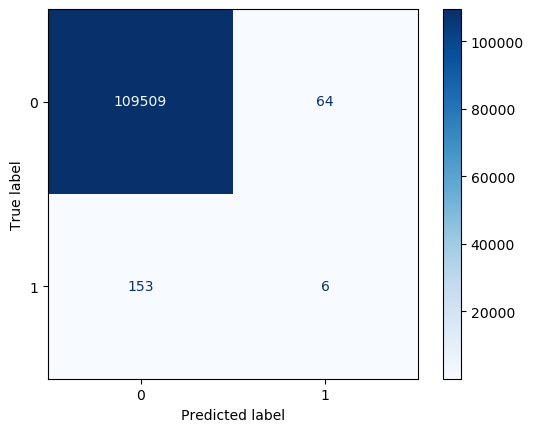

In [20]:
# Probamos modelo de Árbol de Decisión por default con datos originales

modelo_report(X_train, X_test, y_train, y_test)

## Resampling

### Undersampling

In [21]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy=0.20)

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    2375
1     475
Name: deaths, dtype: int64

Composición del test set:
0    109573
1       159
Name: deaths, dtype: int64


Accuracy= 0.8558305690227098
Recall= 0.4528301886792453
Precision= 0.0045555204049351474
F-1 Score= 0.009020295665246807
Area bajo la curva ROC: 0.6623


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


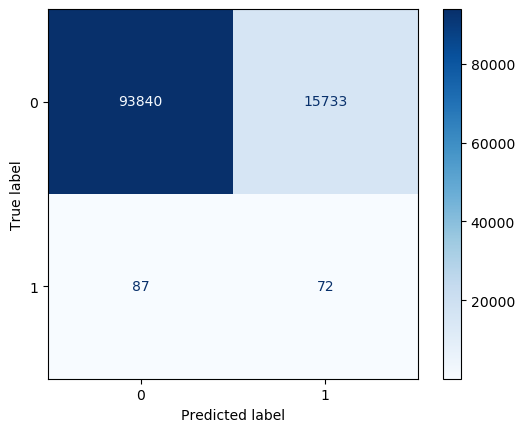

In [22]:
# Probamos modelo con nuevo dataset 'sampling_strategy=0.20'

modelo_report(X_train_us, X_test, y_train_us, y_test)

Composición del training set:
0    1583
1     475
Name: deaths, dtype: int64


Accuracy= 0.8162796631793825
Recall= 0.39622641509433965
Precision= 0.0031301237144134744
F-1 Score= 0.006211180124223603
Area bajo la curva ROC: 0.6072


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


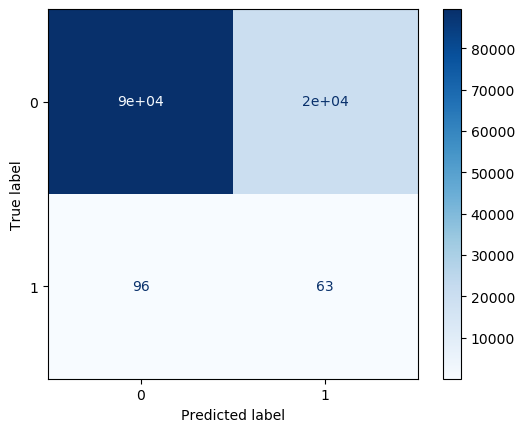

In [23]:
# Probamos con otra proporción de clases

undersampler_2=RandomUnderSampler(sampling_strategy=0.30)

X_train_us_2,y_train_us_2=undersampler_2.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_2.value_counts())

print("\n")
modelo_report(X_train_us_2, X_test, y_train_us_2, y_test)

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64


Accuracy= 0.8319268763897496
Recall= 0.41509433962264153


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision= 0.003583840139009557
F-1 Score= 0.007106325706594886
Area bajo la curva ROC: 0.6222


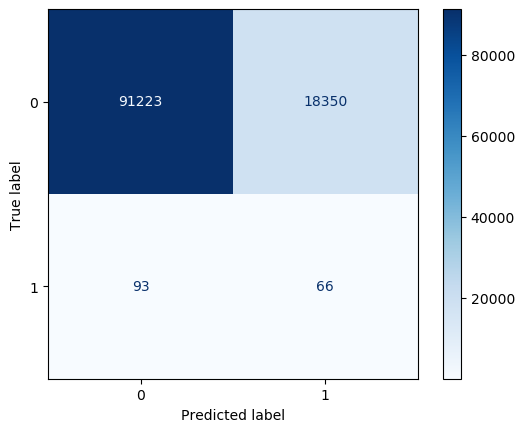

In [24]:
# Probamos con otra proporción de clases

undersampler_3=RandomUnderSampler(sampling_strategy=0.25)

X_train_us_3,y_train_us_3=undersampler_3.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_3.value_counts())

print("\n")
modelo_report(X_train_us_3, X_test, y_train_us_3, y_test)

### Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts(normalize=True))

print('\nComposición del test set:')
print(y_test.value_counts())


Composición del training set:
1    0.5
0    0.5
Name: deaths, dtype: float64

Composición del test set:
0    109573
1       159
Name: deaths, dtype: int64


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9802792257500091
Recall= 0.031446540880503145
Precision= 0.0024813895781637717
F-1 Score= 0.004599816007359705
Area bajo la curva ROC: 0.5068


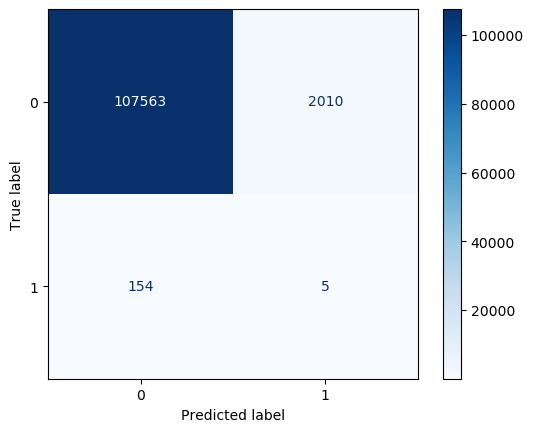

In [26]:
modelo_report(X_train_os, X_test, y_train_os, y_test)

Composición del training set:
0    0.869566
1    0.130434
Name: deaths, dtype: float64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9830404986694856
Recall= 0.025157232704402517
Precision= 0.0023391812865497076
F-1 Score= 0.004280363830925629
Area bajo la curva ROC: 0.5035


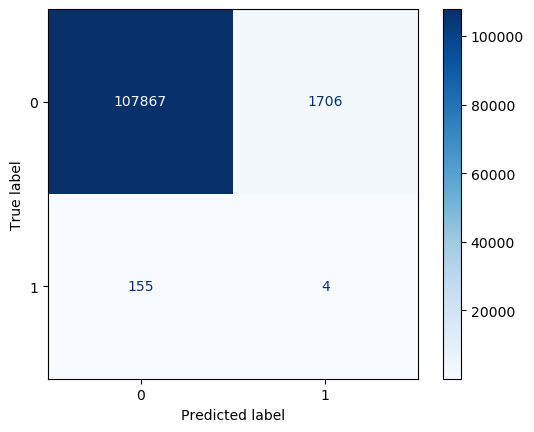

In [27]:
# Probamos con otra proporción

oversampler_2=RandomOverSampler(sampling_strategy=0.15);

X_train_os_2,y_train_os_2=oversampler_2.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os_2.value_counts(normalize=True))

print("\n")
modelo_report(X_train_os_2, X_test, y_train_os_2, y_test)

### Oversampling con SMOTENC

In [28]:
X_2 = pd.merge(df[col_categoricas], df.injured, left_index=True, right_index=True, how='inner')
X_2.columns

Index(['borough', 'vehicle', 'main_contributing_factor', 'road_type',
       'time_of_day', 'weekday', 'season', 'injured'],
      dtype='object')

In [29]:
# Volvemos a hacer el train test split (con la misma semilla que al principio) conservando las variables categóricas

X_train_cat, X_test_cat, y_train_2, y_test_2 = train_test_split(X_2, y, stratify = y, random_state=42)

In [30]:
from imblearn.over_sampling import SMOTENC

categorical_cols=(X_train_cat.dtypes=='object').values

sm=SMOTENC(categorical_features=categorical_cols,sampling_strategy=0.15, k_neighbors=5,random_state=0)
X_train_sm,y_train_sm=sm.fit_resample(X_train_cat,y_train_2)

In [31]:
print('Training set:')
print(y_train_sm.value_counts(normalize=True))

print('\nTest set:')
print(y_test_2.value_counts())

Training set:
0    0.869566
1    0.130434
Name: deaths, dtype: float64

Test set:
0    109573
1       159
Name: deaths, dtype: int64


In [32]:
train_dummies = pd.get_dummies(X_train_sm[col_categoricas],drop_first=True, dtype=float)

test_dummies = pd.get_dummies(X_test_cat[col_categoricas],drop_first=True, dtype=float)

X_train_final = pd.merge(train_dummies, X_train_sm.injured, left_index=True, right_index=True, how='inner')

X_test_final = pd.merge(test_dummies, df.injured, left_index=True, right_index=True, how='inner')

print(X_train_final.shape)
print(X_test_final.shape)

(378029, 43)
(109732, 43)


In [33]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_sm.shape)
print(y_test_2.shape)

(378029, 43)
(109732, 43)
(378029,)
(109732,)


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9730434148653082
Recall= 0.08176100628930817
Precision= 0.004601769911504424
F-1 Score= 0.00871313672922252
Area bajo la curva ROC: 0.5353


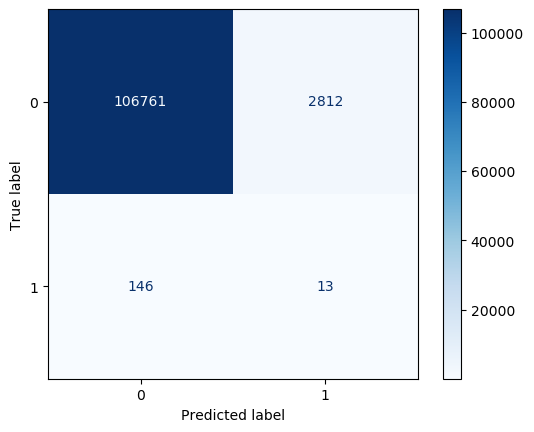

In [34]:
modelo_report(X_train_final, X_test_final, y_train_sm, y_test_2)

Training set:
0    328721
1    115052
Name: deaths, dtype: int64

Test set:
0    109573
1       159
Name: deaths, dtype: int64


Accuracy= 0.9632741588597674
Recall= 0.07547169811320754
Precision= 0.0030808729139922978
F-1 Score= 0.0059200789343857915
Area bajo la curva ROC: 0.5254


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


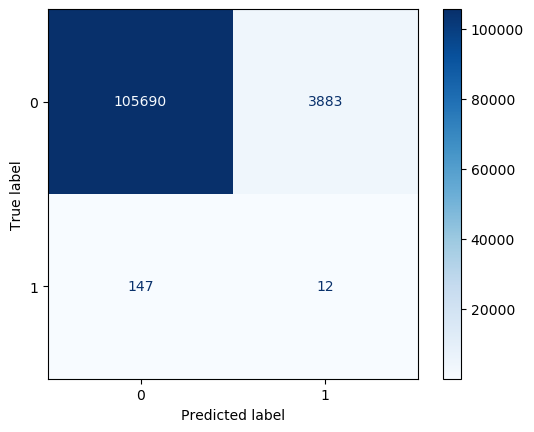

In [35]:
# Probamos con otra proporción

X_train_cat_2, X_test_cat_2, y_train_3, y_test_3 = train_test_split(X_2, y, stratify = y, random_state=42)

sm_2=SMOTENC(categorical_features=categorical_cols,sampling_strategy=0.35, k_neighbors=5,random_state=1)
X_train_sm_2,y_train_sm_2=sm_2.fit_resample(X_train_cat_2,y_train_3)

print('Training set:')
print(y_train_sm_2.value_counts())

print('\nTest set:')
print(y_test_3.value_counts())

train_dummies_2 = pd.get_dummies(X_train_sm_2[col_categoricas],drop_first=True, dtype=float)

test_dummies_2 = pd.get_dummies(X_test_cat_2[col_categoricas],drop_first=True, dtype=float)

X_train_final_2 = pd.merge(train_dummies_2, X_train_sm_2.injured, left_index=True, right_index=True, how='inner')

X_test_final_2 = pd.merge(test_dummies_2, X_test_cat_2.injured, left_index=True, right_index=True, how='inner')

print("\n")
modelo_report(X_train_final_2, X_test_final_2, y_train_sm_2, y_test_2)

### Resultados: 

A partir de los resultados obtenidos probando las distintas estrategias de resampling, optaremos por usar la estrategia de undersampling con un sample_strategy = 0.25

## Modelos de Ensamble con árboles de decisión

### Bagging

In [36]:
# Probaremos un modelo de Bagging usando un dataset resampleado con undersampling

from sklearn.ensemble import BaggingClassifier

clftree = tree.DecisionTreeClassifier()

bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [37]:
# Definimos una nueva función para evaluar modelos modificando la creada anteriormente

def modelo_report_2(X_train,X_test,y_train,y_test, model):

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)

    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')

    print('Accuracy=', accuracy_score(y_test, y_pred))
    print('Recall=', recall_score(y_test, y_pred))
    print('Precision=', precision_score(y_test, y_pred))
    print('F-1 Score=', f1_score(y_test,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))

    return

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9006853060182991
Recall= 0.42138364779874216
Precision= 0.006162052791317944
F-1 Score= 0.0121464829586657
Area bajo la curva ROC: 0.7756


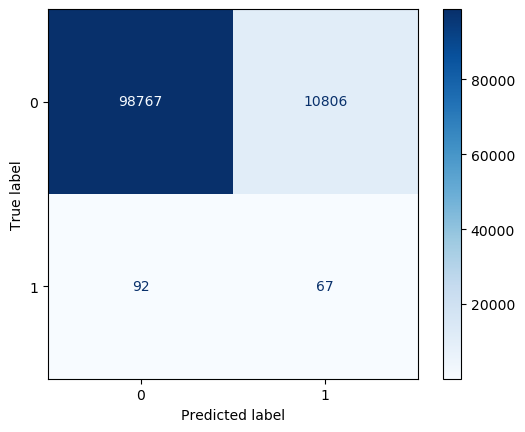

In [38]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_bg=RandomUnderSampler(sampling_strategy=0.25)

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

Composición del training set:
1    475
0    475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.684276236649291
Recall= 0.7547169811320755
Precision= 0.003455624028105742
F-1 Score= 0.0068797477425827725
Area bajo la curva ROC: 0.7907


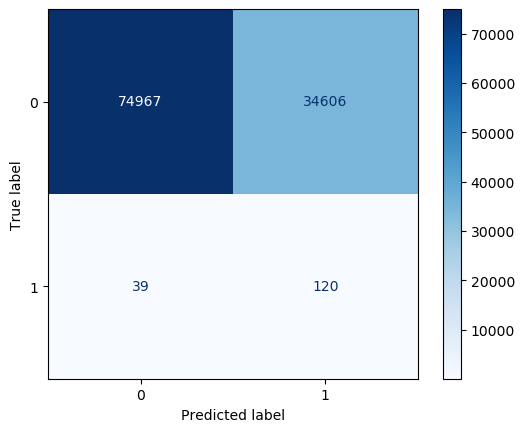

In [39]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_bg=RandomUnderSampler(sampling_strategy='majority')

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

Composición del training set:
0    1187
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.8616994131155907
Recall= 0.5345911949685535
Precision= 0.0055968920787515634
F-1 Score= 0.011077805291281115
Area bajo la curva ROC: 0.7896


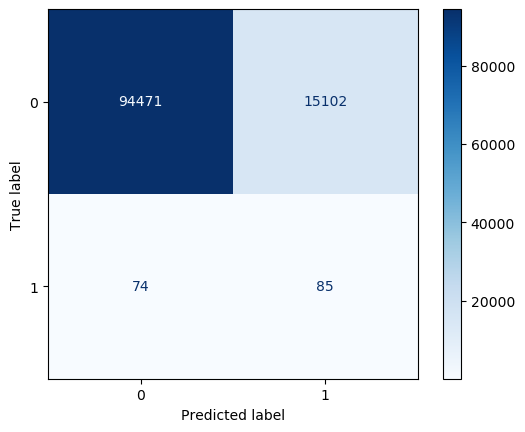

In [40]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_bg=RandomUnderSampler(sampling_strategy=0.4)

X_train_bg,y_train_bg=undersampler_bg.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_bg.value_counts())

# Probamos el modelo de bagging

print("\n")
modelo_report_2(X_train_bg, X_test, y_train_bg, y_test, bag_clf)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9418947982357015
Recall= 0.3270440251572327
Precision= 0.008226546432526499
F-1 Score= 0.01604938271604938
Area bajo la curva ROC: 0.7805


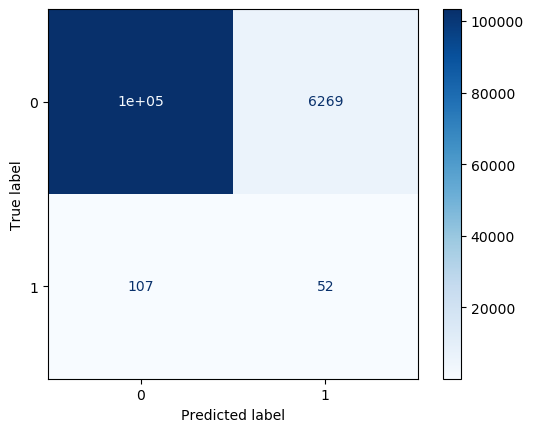

In [42]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_rf=RandomUnderSampler(sampling_strategy=0.25)

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

Composición del training set:
1    475
0    475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.692450698064375
Recall= 0.7169811320754716
Precision= 0.0033710855486885293
F-1 Score= 0.00671061926065458
Area bajo la curva ROC: 0.7827


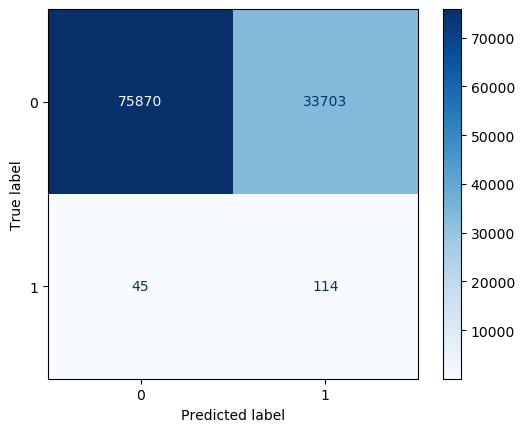

In [43]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_rf=RandomUnderSampler(sampling_strategy='majority')

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

Composición del training set:
0    1187
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.894871140597091
Recall= 0.46540880503144655
Precision= 0.006420824295010846
F-1 Score= 0.01266689489900719
Area bajo la curva ROC: 0.7889


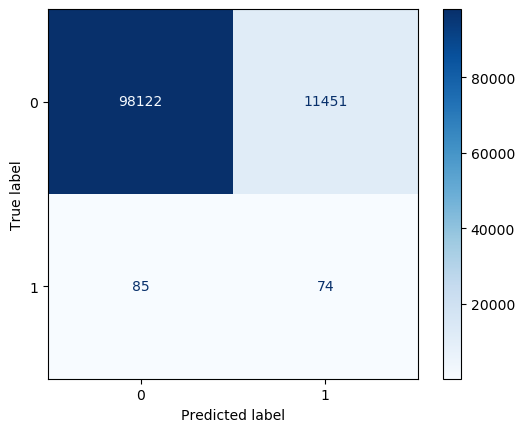

In [44]:
# 3 - Probamos con otra proporción de clases en el dataset

undersampler_rf=RandomUnderSampler(sampling_strategy=0.4)

X_train_rf,y_train_rf=undersampler_rf.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_rf.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_rf, X_test, y_train_rf, y_test, rf_clf)

### LightGBM

In [45]:
import lightgbm as lgb

In [46]:
model_lgb = lgb.LGBMClassifier()

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.9318430357598513
Recall= 0.4339622641509434
Precision= 0.00925181013676589
F-1 Score= 0.01811736904293029
Area bajo la curva ROC: 0.796


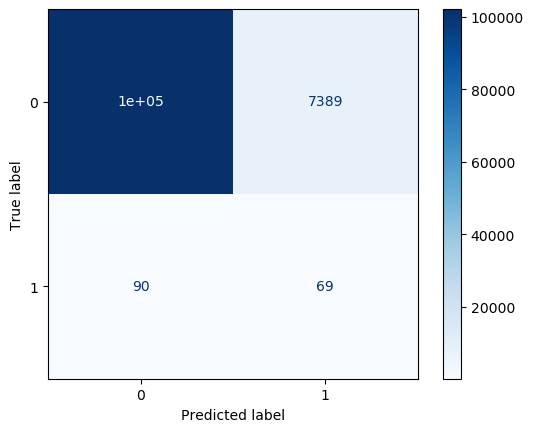

In [47]:
# 1 - Generamos dataset a utilizar con undersampling

undersampler_lgb=RandomUnderSampler(sampling_strategy=0.25)

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

Composición del training set:
1    475
0    475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.6821619946779426
Recall= 0.7547169811320755
Precision= 0.003432690657360261
F-1 Score= 0.006834296779337642
Area bajo la curva ROC: 0.7886


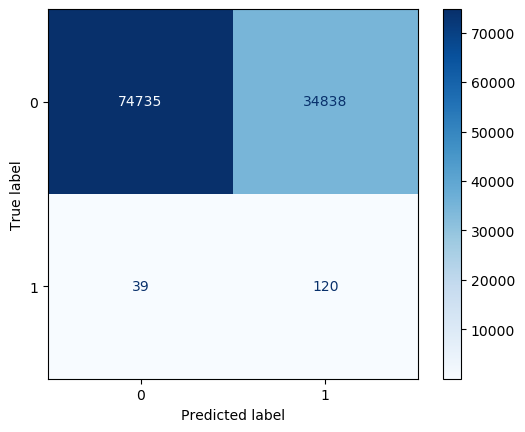

In [48]:
# 2 - Probamos con otra proporción de clases en el dataset

undersampler_lgb=RandomUnderSampler(sampling_strategy='majority')

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

Composición del training set:
0    1187
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.8901687748332301
Recall= 0.5031446540880503
Precision= 0.006637351696673027
F-1 Score= 0.013101867016049788
Area bajo la curva ROC: 0.8


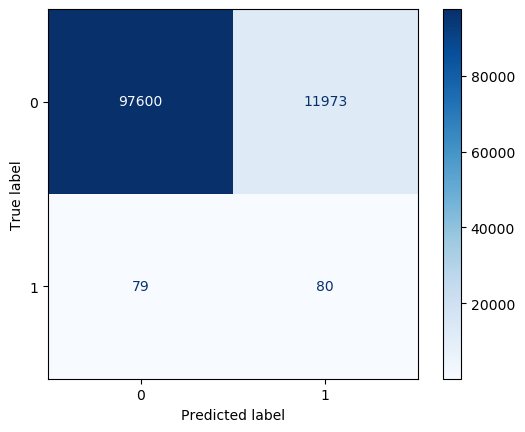

In [49]:
# 3 - Probamos con otra proporción de clases en el dataset

undersampler_lgb=RandomUnderSampler(sampling_strategy=0.4)

X_train_lgb,y_train_lgb=undersampler_lgb.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_lgb.value_counts())

# Probamos el modelo de random forest

print("\n")
modelo_report_2(X_train_lgb, X_test, y_train_lgb, y_test, model_lgb)

## Xgboost

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64


[20:22:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.8838442751430758
Recall= 0.4276729559748428
Precision= 0.00534465141869056
F-1 Score= 0.01055736686849868
Area bajo la curva ROC: 0.7333


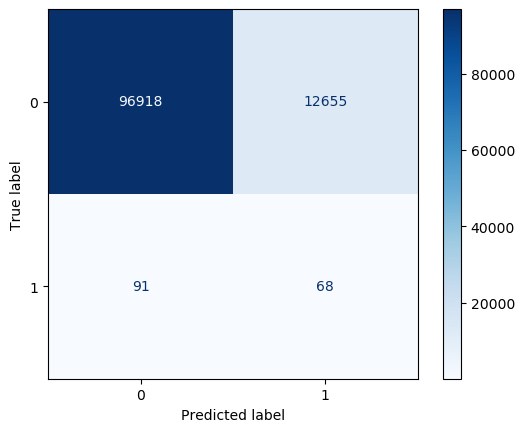

In [50]:
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler

clftree = xgb.XGBClassifier()

boost_clf = xgb.XGBClassifier(base_estimator=clftree, n_estimators=1000,
                              random_state=42)

# Reemplazamos la función modelo_report_2

def modelo_report_3(X_train,X_test,y_train,y_test, model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)

    plot_confusion_matrix(model,X_test,y_test,cmap='Blues')

    print('Accuracy=', accuracy_score(y_test, y_pred))
    print('Recall=', recall_score(y_test, y_pred))
    print('Precision=', precision_score(y_test, y_pred))
    print('F-1 Score=', f1_score(y_test,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))

    return

#1 Generamos el dataset con undersampling

undersampler_boost = RandomUnderSampler(sampling_strategy=0.25)

X_train_boost, y_train_boost = undersampler_boost.fit_resample(X_train, y_train)

print('Composición del training set:')
print(y_train_boost.value_counts())

# Probamos el modelo de Boosting

print("\n")
modelo_report_3(X_train_boost, X_test, y_train_boost, y_test, boost_clf)


Composición del training set:
0    1187
1     475
Name: deaths, dtype: int64


[20:22:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.8166806401049831
Recall= 0.5471698113207547
Precision= 0.004321692911430133
F-1 Score= 0.008575653031049778
Area bajo la curva ROC: 0.743


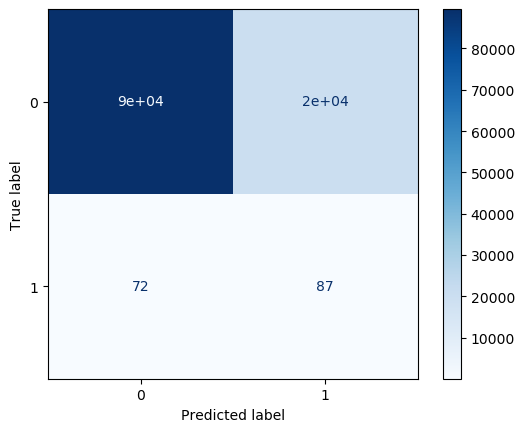

In [51]:
#2 Generamos el dataset con undersampling

undersampler_boost = RandomUnderSampler(sampling_strategy=0.4)

X_train_boost, y_train_boost = undersampler_boost.fit_resample(X_train, y_train)

print('Composición del training set:')
print(y_train_boost.value_counts())

# Probamos el modelo de Boosting

print("\n")
modelo_report_3(X_train_boost, X_test, y_train_boost, y_test, boost_clf)

Composición del training set:
1    475
0    475
Name: deaths, dtype: int64


[20:22:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy= 0.6517879925637007
Recall= 0.6729559748427673
Precision= 0.0027962890369789624
F-1 Score= 0.005569435769310847
Area bajo la curva ROC: 0.7223


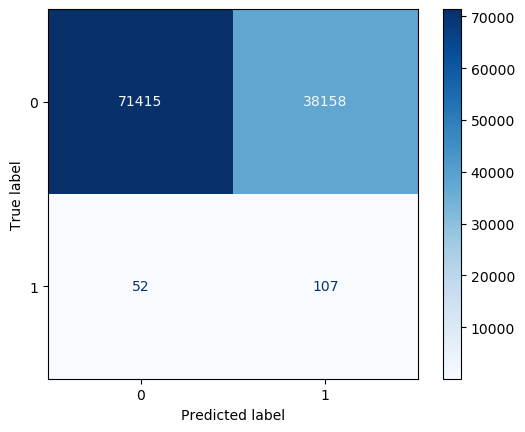

In [52]:
#3 Generamos el dataset con undersampling

undersampler_boost = RandomUnderSampler(sampling_strategy='majority')

X_train_boost, y_train_boost = undersampler_boost.fit_resample(X_train, y_train)

print('Composición del training set:')
print(y_train_boost.value_counts())

# Probamos el modelo de Boosting

print("\n")
modelo_report_3(X_train_boost, X_test, y_train_boost, y_test, boost_clf)

## Modelo baseline: KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

def modelo_report(X_train, X_test, y_train, y_test):
    # Instantiate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Instantiate a Bagging classifier with the KNN as the base estimator
    bagging = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

    # Fit the Bagging classifier to the training data
    bagging.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = bagging.predict(X_test)

    # Generate class probabilities for the test data
    y_proba = bagging.predict_proba(X_test)

    # Visualize the confusion matrix for the test data
    plot_confusion_matrix(bagging, X_test, y_test, cmap='Blues')

    # Calculate and print the evaluation metrics
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Recall =', recall_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred))
    print('F-1 Score =', f1_score(y_test, y_pred))
    print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test, y_proba[:,1]), 4))

    return



## Resampling

### Undersampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy=0.20)

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    2375
1     475
Name: deaths, dtype: int64

Composición del test set:
0    109573
1       159
Name: deaths, dtype: int64


c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy = 0.9648142747785514
Recall = 0.2138364779874214
Precision = 0.009018567639257295
F-1 Score = 0.017307202850598117
Area bajo la curva ROC: 0.7204


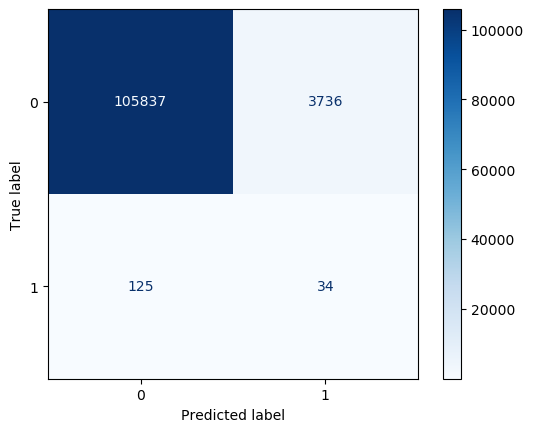

In [55]:
# Probamos modelo con nuevo dataset 'sampling_strategy=0.20'

modelo_report(X_train_us, X_test, y_train_us, y_test)

Composición del training set:
0    1583
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy = 0.9424051325046476
Recall = 0.2641509433962264
Precision = 0.006725380304243395
F-1 Score = 0.01311680199875078
Area bajo la curva ROC: 0.7401


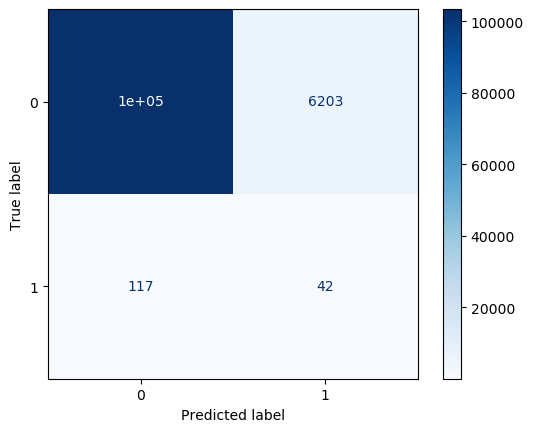

In [56]:
# Probamos con otra proporción de clases

undersampler_2=RandomUnderSampler(sampling_strategy=0.30)

X_train_us_2,y_train_us_2=undersampler_2.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_2.value_counts())

print("\n")
modelo_report(X_train_us_2, X_test, y_train_us_2, y_test)

Composición del training set:
0    1900
1     475
Name: deaths, dtype: int64




c:\Users\Ian Denham\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy = 0.9529672292494441
Recall = 0.20754716981132076
Precision = 0.006511444356748224
F-1 Score = 0.012626745743256168
Area bajo la curva ROC: 0.7294


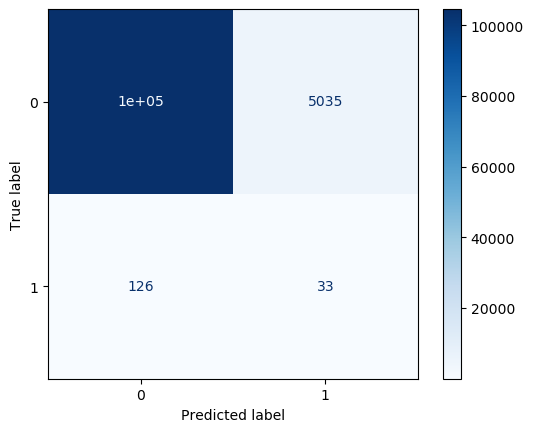

In [57]:
# Probamos con otra proporción de clases

undersampler_3=RandomUnderSampler(sampling_strategy=0.25)

X_train_us_3,y_train_us_3=undersampler_3.fit_resample(X_train,y_train)

print('Composición del training set:')
print(y_train_us_3.value_counts())

print("\n")
modelo_report(X_train_us_3, X_test, y_train_us_3, y_test)